<a href="https://colab.research.google.com/github/manjuiitm/MLP/blob/main/Multiclass_classification_OVR%2COVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-vs-Rest Classification
ovr_classifier = OneVsRestClassifier(LogisticRegression())
ovr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ovr_classifier.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.67      0.61      0.64       104
           2       0.59      0.62      0.61        96

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300



In [4]:
from sklearn.multiclass import OneVsOneClassifier

# One-vs-One Classification
ovo_classifier = OneVsOneClassifier(LogisticRegression())
ovo_classifier.fit(X_train, y_train)

# Make predictions
y_pred_ovo = ovo_classifier.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_ovo))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.72      0.62      0.66       104
           2       0.62      0.74      0.68        96

    accuracy                           0.71       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.72      0.71      0.71       300



In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Preprocess dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Define a simple neural network
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with softmax for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2781 - loss: 1.2444 - val_accuracy: 0.3786 - val_loss: 1.1233
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3894 - loss: 1.1061 - val_accuracy: 0.4571 - val_loss: 1.0521
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4718 - loss: 1.0290 - val_accuracy: 0.5214 - val_loss: 0.9978
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5338 - loss: 0.9583 - val_accuracy: 0.5500 - val_loss: 0.9510
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5911 - loss: 0.9140 - val_accuracy: 0.6000 - val_loss: 0.9100
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5901 - loss: 0.8755 - val_accuracy: 0.6214 - val_loss: 0.8702
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6295 - loss: 0.8257 - val_accuracy: 0.6571 - val_loss: 0.8328
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6415 - loss: 0.7900 - val_accuracy: 0.6786 - val_loss: 0.7972
Ep

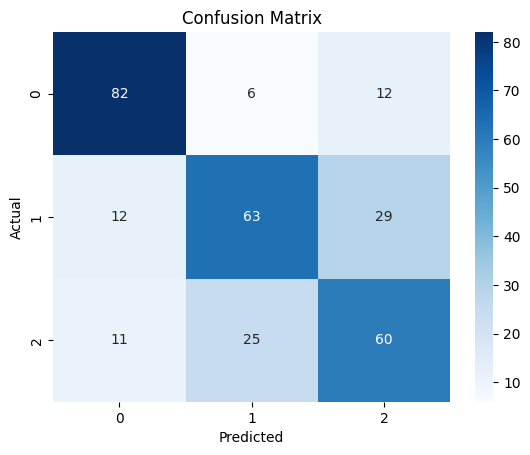

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
from sklearn.metrics import classification_report, accuracy_score

# Classification report for precision, recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate and display overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.67      0.61      0.64       104
           2       0.59      0.62      0.61        96

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300

Overall Accuracy: 68.33%


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")

Accuracy: 79.33%


In [9]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%")

Accuracy: 76.33%


In [10]:
from sklearn.svm import SVC

# Train SVM with One-vs-Rest strategy
svm = SVC(decision_function_shape='ovr')
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")

Accuracy: 86.33%
